## Try 8.6.1: *k*-fold cross-validation in Python.

In [1]:
# Import packages and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Import dataset
badDrivers = pd.read_csv('bad-drivers.csv')
badDrivers.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [4]:
badDrivers.columns

Index(['State',
       'Number of drivers involved in fatal collisions per billion miles',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted',
       'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents',
       'Car Insurance Premiums ($)',
       'Losses incurred by insurance companies for collisions per insured driver ($)'],
      dtype='object')

In [5]:
badDrivers.isnull().sum()

State                                                                                                     0
Number of drivers involved in fatal collisions per billion miles                                          0
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                      0
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                              0
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                0
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents    0
Car Insurance Premiums ($)                                                                                0
Losses incurred by insurance companies for collisions per insured driver ($)                              0
dtype: int64

In [6]:


# Split off 20% of the data to be left out as test data
badDriversTrainingdata, testData = train_test_split(badDrivers, test_size=0.20)

# Store relevant columns as variables
X = badDriversTrainingdata[
    ['Losses incurred by insurance companies for collisions per insured driver ($)']
].values.reshape(-1, 1)
y = badDriversTrainingdata[['Car Insurance Premiums ($)']].values.reshape(-1, 1)

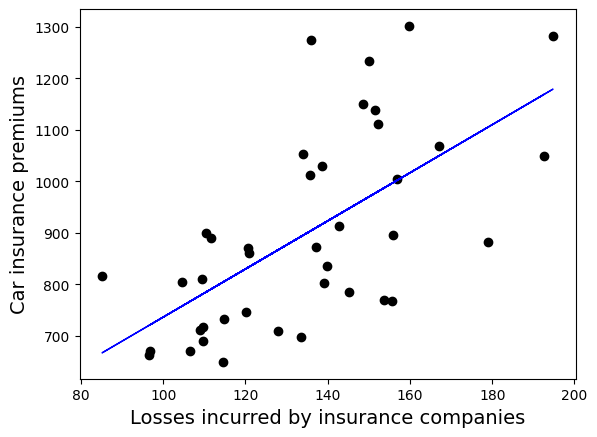

In [7]:
# Fit a linear model to the data
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Plot the fitted model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=1)
plt.xlabel('Losses incurred by insurance companies', fontsize=14);
plt.ylabel('Car insurance premiums', fontsize=14);

In [8]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores = -cross_val_score(
    linModel, X, y, scoring='neg_mean_squared_error', cv=10
)

In [9]:
ten_fold_scores

array([12996.87807435, 10778.73550458, 10986.76165968, 33895.47739866,
       30876.77182785,  9738.23791031, 18476.53340144,  5653.95501826,
       41218.39477942, 62377.11767425])

In [10]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
LOOCV_scores = -cross_val_score(linModel, X, y, scoring='neg_mean_squared_error', cv=40)

In [11]:
LOOCV_scores

array([2.59247903e+04, 1.45333472e+03, 1.34604284e+04, 1.45902546e+04,
       1.83818365e+04, 5.00587580e+03, 1.04464712e+04, 5.77222142e+03,
       1.41309529e+04, 3.19956163e+03, 4.62505481e+03, 2.03973657e+04,
       2.65825969e+04, 1.43740960e+03, 9.06938992e+04, 1.09008573e+04,
       2.87809403e+04, 6.16689439e+04, 1.10222184e+04, 3.99059444e+03,
       2.78863212e+04, 4.43184035e+02, 7.97346276e+03, 5.50006284e+02,
       8.03170532e+02, 3.99479719e+04, 1.16814290e+01, 3.70169704e+04,
       2.51119815e+03, 9.34271886e+02, 1.24278006e+04, 7.51903116e+03,
       2.80584651e+04, 7.51858823e+04, 1.52480200e+04, 2.62571426e+04,
       1.43639305e+05, 5.65759105e+04, 9.48186438e+03, 5.15498035e+04])

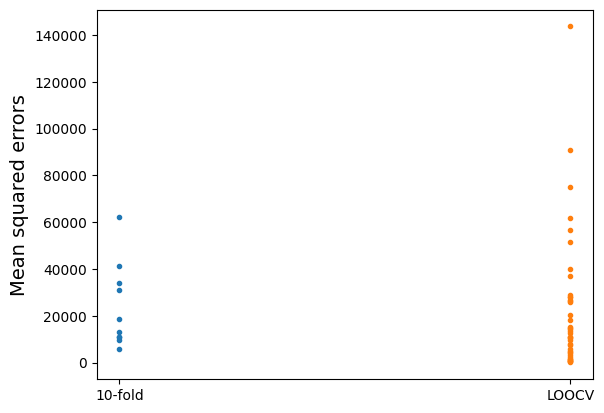

In [12]:
# Plot the errors for both scores
plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14);
plt.xticks([0, 1], ['10-fold', 'LOOCV']);

## challenge activity 8.6.2: Cross-validation using scikit-learn.

## 1) Researchers collected measurements from loblolly pines.

**Split the dataset into train and test datasets using the train_test_split() method with the following parameters, respectively:**
 * **the original data frame**
 * **the test_size parameter set to the test proportion**
 * **the random_state parameter set to rng**

**The proportion for the train dataset is 85%.**

**The code provided contains all imports, loads the dataset, initializes the model, calculates the MSE for 10-fold and **k**-fold cross-validation, and prints the average MSE and the set of all MSEs for 10-fold and *k*-fold cross-validation.**

In [32]:
# Import packages and functions

from sklearn.preprocessing import PolynomialFeatures


In [ ]:


rng = np.random.RandomState(49)

# Load the dataset
loblollyPine = pd.read_csv('loblollyPineSample.csv')

# Split dataset into training data and testing data
trainingDataName, testingDataName = # Your code goes here

# Store relevant columns as variables
X = trainingDataName[['age']]
y = trainingDataName[['height']]

# Initialize the model -- quadratic polynomial regression model
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
quadraticPolynomialRegressionModel = LinearRegression()

# Evaluate accuracy
# neg_mean_square_error is the negative MSE, so append a - so the scores are positive.
tenFoldScores = -cross_val_score(quadraticPolynomialRegressionModel, X, y, scoring='neg_mean_squared_error', cv=10)

print('ten-fold average MSE =', np.mean(tenFoldScores), '\n', tenFoldScores)

# neg_mean_square_error is the negative MSE, so append a minus so the scores are positive.
LOOCVScores = -cross_val_score(quadraticPolynomialRegressionModel, X, y, scoring='neg_mean_squared_error', cv=len(X))

print('\nk-fold average MSE =', np.mean(LOOCVScores), '\n', LOOCVScores)

## 2)Researchers collected measurements from loblolly pines.

* **Calculate the mean squared errors for **k**-fold cross-validation with **k**= 10. Use the negative of the cross_val_score() method with the following parameters, respectively:**
    * **the model variable**
    * **x_variable**
    * **y_variable**
    * **the scoring parameter set to neg_mean_squared_error**
    * **the cv parameter set to 10**

**Both x_variable and y_variable are from the training set.**

**The code provided contains all imports, loads the dataset, splits the dataset into train and test datasets, initializes the model, calculates the MSEs for *k*-fold cross-validation, and prints average MSE and the set of all MSEs for both 10-fold and *k*-fold cross-validation.**

In [ ]:

rng = np.random.RandomState(17)

# Load the dataset
loblollyPine = pd.read_csv('loblollyPineSample.csv')

# Split dataset into training data and testing data
trainDatasetName, testDatasetName = train_test_split(loblollyPine, test_size=0.3, random_state=rng)

# Store relevant columns as variables
X = trainDatasetName[['age']]
y = trainDatasetName[['height']]

# Initialize the model -- quadratic polynomial regression model
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
polynomialRegressionModel = LinearRegression()

# Evaluate accuracy
# neg_mean_square_error is the negative MSE, so append a minus so the scores are positive.
tenFoldScores = # Your code goes here

print('ten-fold average MSE =', np.mean(tenFoldScores), '\n', tenFoldScores)

# neg_mean_square_error is the negative MSE, so append a - so the scores are positive.
LOOCVScores = -cross_val_score(polynomialRegressionModel, X, y, scoring='neg_mean_squared_error', cv=len(X))

print('\nk-fold average MSE =', np.mean(LOOCVScores), '\n', LOOCVScores)

## 3) Researchers collected measurements from loblolly pines.

Calculate the mean squared errors for **k**-fold cross-validation with *k*= length of the training dataset. Use the negative of the cross_val_score() method with the following parameters, respectively:
the model variable
* **x_variable**
* **y_variable**
* **the scoring parameter set to neg_mean_squared_error**
* **the cv parameter set to len(x_variable)**
  
**Both x_variable and y_variable are from the training set.**

**The code provided contains all imports, loads the dataset, splits the dataset into train and test datasets, initializes the model, calculates the MSEs for *k*-fold cross-validation, and prints average MSE and the set of all MSEs for both 10-fold and *k*-fold cross-validation.**

In [ ]:


rng = np.random.RandomState(8)

# Load the dataset
pines = pd.read_csv('pinesSample.csv')

# Split dataset into training data and testing data
trainDataName, testDataName = train_test_split(pines, test_size=0.3, random_state=rng)

# Store relevant columns as variables
X = trainDataName[['age']]
y = trainDataName[['height']]

# Initialize the model -- quadratic polynomial regression model
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
quadraticPolynomialRegressionModel = LinearRegression()

# Evaluate accuracy
# neg_mean_square_error is the negative MSE, so append a - so the scores are positive.
tenFoldScores = -cross_val_score(quadraticPolynomialRegressionModel, X, y, scoring='neg_mean_squared_error', cv=10)

print('ten-fold average MSE =', np.mean(tenFoldScores), '\n', tenFoldScores)

# neg_mean_square_error is the negative MSE, so append a - so the scores are positive.
LOOCVScores = # Your code goes here

print('\nk-fold average MSE =', np.mean(LOOCVScores), '\n', LOOCVScores)